# <span style = "color:green"> Implementing LSTM neural network with TensorFlow Keras </span>

***

Here, we will use the stock price dataset to build an LSTM in keras that will predict if the stock will go up or down.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'tatatrain.csv'

In [2]:
train = pd.read_csv('tatatrain.csv')

### View head

In [3]:
train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Check the shape of the dataset

In [4]:
train.shape

(2035, 8)

### We only need 'Open' feature in our dataset, Remove the rest

Open column represent the starting price of the stock for the day

In [5]:
train_data = train[['Open']]

### Plot Open price 

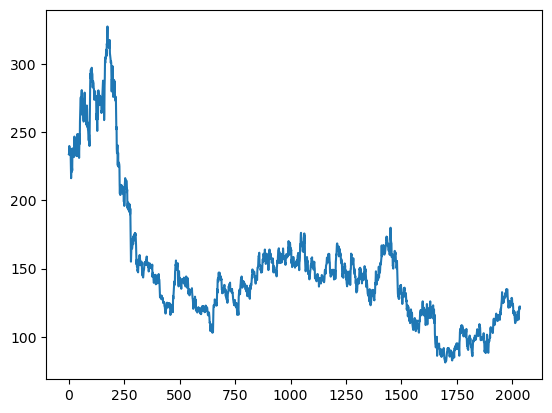

In [6]:
plt.plot(train_data)

### Scale the data with MinMaxScaler

To produce the best-optimized results with the models, we are required to scale the data, For this task, we are leveraging scikit-learn library's minmax scaler for converting the input values betweeen 0 to 1.

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_data = scaler.fit_transform(train_data)

### Plot the open prices after scaling

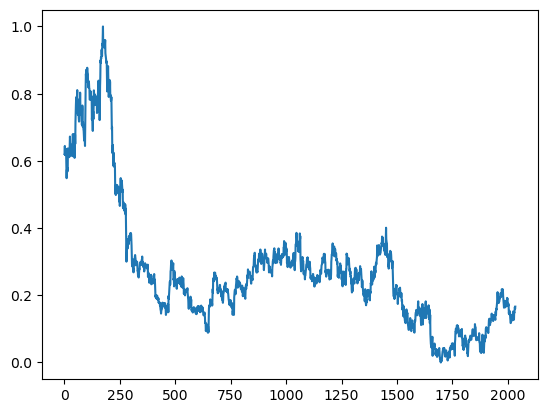

In [10]:
plt.plot(train_data)

### Creating data with Timesteps

When we are working with LSTM's, we need to keep the data in a specific format. Once the data is created in the form of 60 timesteps, we can then convert it into a Numpy array. Finally, the data is converted to a 3 dimensional array, 60 timeframes, and also one feature at each step.

In [11]:
len(train_data)

2035

In [12]:
X = []
y = []

for i in range(60, 2035):
    X.append(train_data[i-60:i,0])
    y.append(train_data[i,0])
    
X = np.array(X)
y = np.array(y)

In [13]:
X = X.reshape((X.shape[0], X.shape[1],1))

### Split the dataset into training and testing set

In [14]:
X_train = X[0:1700]
X_test = X[1700:]

y_train = y[0:1700]
y_test = y[1700:]

### Check the shape of X_train

In [15]:
X_train.shape

(1700, 60, 1)

### Import Sequential and layers from Keras

In [16]:
from tensorflow.keras import Sequential, layers

### Building an LSTM model with Keras

First, we add the keras LSTM layer, and following this, we add dropout layers for prevention against overfitting.

For the LSTM layer, we add 50 units that represent the dimensionality of outer space. The return_sequences parameter is set to true for returning the last output in output.

For addding dropout layers, we specify the percentage of layers that should be dropped. The next step is to add the dense layer.

In [17]:
model = Sequential()

model.add(layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(50, return_sequences = True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(50))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))

C:\Users\mnkv1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Check the summary of our model

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

We compile the model with the help of adam optimizer. The error is computed using mean_squared_error.

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train the model

Finally, the model is fit using 100 epochs with a batch size of 32.

In [20]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.0309
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0030
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0032
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0031
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0023
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0020
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0021
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0024
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0019
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0021
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0019
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0018
Epoch 13/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0015
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0017
Epoch 15/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - l

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 7.3747e-04
Epoch 80/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 6.5339e-04
Epoch 81/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.4238e-04
Epoch 82/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.6052e-04
Epoch 83/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0010
Epoch 84/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 7.3268e-04
Epoch 85/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 6.4059e-04
Epoch 86/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 7.2049e-04
Epoch 87/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 7.5090e-04
Epoch 88/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 7.8157e-04
Epoch 89/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.2538e-04
Epoch 90/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 6.3558e-04
Epoch 91/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 6.8305e-04
Epoch 92/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 6.0498e-04
Epoch 93/

## Predicting future stock using the Test Set

In [21]:
predicted_stock_price = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [22]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [23]:
predicted_stock_price.shape

(275, 1)

In [24]:
y_test = y_test.reshape(275,1)

In [25]:
y_test = scaler.inverse_transform(y_test)

### Plotting the results

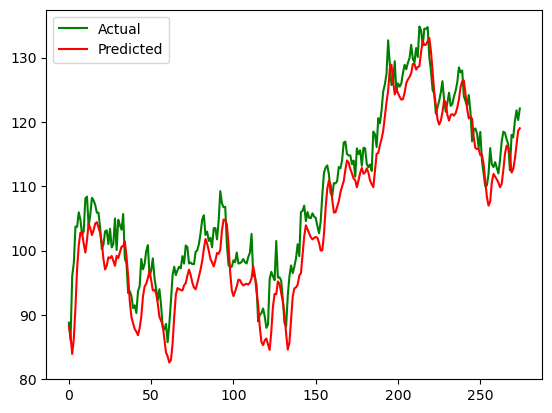

In [26]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted')
plt.legend()

***